In [1]:
!head data/train.csv

In [2]:
import pandas as pd
train_list = pd.read_csv('data/train.csv')

In [59]:
clusters = {} # Unique.
mapping = {}

In [62]:
new_clusters = 0
append_clusters = 0
for i, row in enumerate(train_list.itertuples()):
    if i % 10000 == 0:
        print(i)
    if not row.is_duplicate:
        continue
    clust1 = mapping.get(row.qid1)
    clust2 = mapping.get(row.qid2)
    if clust1 is None and clust2 is None:
        # Completely new.
        new_clusters += 1
        clusters[row.qid1] = [row.qid1, row.qid2]
        mapping[row.qid1] = clusters[row.qid1]
        mapping[row.qid2] = clusters[row.qid1]
    elif clust1 is None:
        append_clusters += 1
        clust2.append(row.qid1)
        mapping[row.qid1] = clust2
    elif clust2 is None:
        append_clusters += 1
        clust1.append(row.qid2)
        mapping[row.qid2] = clust1
    else:
        # Two diff clusters - merge.
        for x in clust2:
            if isinstance(x, int):
                mapping[x] = clust1
        clust2.append(None)
        clust1.append(clust2)
        
print(new_clusters)
print(append_clusters)

0
10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000
120000
130000
140000
150000
160000
170000
180000
190000
200000
210000
220000
230000
240000
250000
260000
270000
280000
290000
300000
310000
320000
330000
340000
350000
360000
370000
380000
390000
400000


In [63]:
all_dups = pd.read_csv('data/all_duplicates.tsv', delimiter='\t', index_col=None, header=None)

In [66]:
all_dups_sort = all_dups.sort_values([0, 1])
all_dups_sort[:10]

,0,1,2
239597,1,1,1.0
365865,2,2,1.0
546918,3,3,1.0
795300,4,4,1.0
937705,5,5,1.0
7616,6,6,1.0
276945,7,7,1.0
373856,8,8,1.0
568582,9,9,1.0
276801,10,10,1.0


In [67]:
all_dups_sort.columns = ['qid1', 'qid2', 'count']

In [68]:
ads_diff = all_dups_sort[all_dups_sort['qid1'] != all_dups_sort['qid2']]

In [69]:
ads_diff[:10]

,qid1,qid2,count
464092,11,12,2.0
530608,12,11,2.0
107577,15,16,2.0
168316,16,15,2.0
841428,23,24,2.0
151009,24,23,2.0
293944,25,26,3.0
286980,25,114035,3.0
350605,26,25,3.0
412484,26,114035,3.0


In [71]:
a_child = {}
clusters = {}
# ads_diff graph clusters are complete graphs.
for row in ads_diff.itertuples():
    if row.qid1 in a_child:
        continue
    a_child[row.qid2] = True # already a child of something else
    if row.qid1 not in clusters:
        clusters[row.qid1] = [row.qid1]
    clusters[row.qid1].append(row.qid2)

In [73]:
all_clusts = list(clusters.values())

In [77]:
lens = [len(clust) for clust in all_clusts]

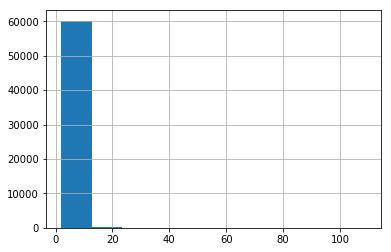

In [80]:
%matplotlib inline
pd.Series(lens).hist()

In [81]:
data = {
    'clusters': all_clusts
}

In [82]:
import json

In [84]:
json.dump(data, open('data/clusters.json', 'w'), indent=2, sort_keys=True)

# Canonical data splits

In [85]:
!head data/all_questions.csv

1,What is the step by step guide to invest in share market in india?
3,What is the story of Kohinoor (Koh-i-Noor) Diamond?
5,How can I increase the speed of my internet connection while using a VPN?
7,Why am I mentally very lonely? How can I solve it?
9,"Which one dissolve in water quikly sugar, salt, methane and carbon di oxide?"
11,Astrology: I am a Capricorn Sun Cap moon and cap rising...what does that say about me?
13,Should I buy tiago?
15,How can I be a good geologist?
17,When do you use シ instead of し?
19,Motorola (company): Can I hack my Charter Motorolla DCX3400?


In [117]:
questions = pd.read_csv('data/all_questions.csv', header=None, index_col=0)
print(len(questions))
questions[:10]

537933


,1
0,
1,What is the step by step guide to invest in sh...
3,What is the story of Kohinoor (Koh-i-Noor) Dia...
5,How can I increase the speed of my internet co...
7,Why am I mentally very lonely? How can I solve...
9,"Which one dissolve in water quikly sugar, salt..."
11,Astrology: I am a Capricorn Sun Cap moon and c...
13,Should I buy tiago?
15,How can I be a good geologist?
17,When do you use シ instead of し?


In [96]:
np.random.shuffle(all_clusts)

In [118]:
import numpy as np
indices = range(len(questions))
np.random.shuffle(indices)

In [122]:
print(indices[33:40])
questions.reset_index().iloc[indices[33:40]]

[247368, 519363, 258900, 413437, 250947, 213034, 503890]


,0,1
247368,459668,What's your dream?
519363,502058,I discovered a neighbor neglecting a dog and l...
258900,480503,Can I crack JEE in 6 months?
413437,287293,How can you pass urine drug test in 48 hours?
250947,466150,F.R.I.E.N.D.S or The Big Bang Theory: Which on...
213034,397304,What's the average number of lies humans speak...
503890,471743,Can a married person crack UPSC exam?


In [123]:
questions.ix[all_clusts[127]]

,1
0,
3508,What is light made up of?
3509,What exactly is light made of?
75879,What are light made of?
75880,What is light made out of?
214820,Light is made of what?
219112,What is light made of?


In [106]:
all_clusts[20]

[103122, 103123, 483029]

In [124]:
questions_train = questions.iloc[indices[:350000]]
questions_valid = questions.iloc[indices[350000:]]
questions_train[:10]

,1
0,
359696,What are the personality traits of a Labrador/...
134704,What is the Java Applet code for calculator fo...
154531,What is the risk of a propane tank exploding?
298632,What was your most embarrassing moment in fron...
443480,Is Jeff Bezos on Quora?
289176,What are some of the best projects that can be...
38668,What is air resistance? What are some examples?
123996,Why aren't all books and research papers in sc...
52066,What is the best way to deal with social anxie...


In [128]:
questions_train.to_csv('data/questions_train.csv', header=False)
questions_valid.to_csv('data/questions_valid.csv', header=False)
!head data/questions_train.csv

359696,What are the personality traits of a Labrador/Hound mix?
134704,What is the Java Applet code for calculator for multiple numbers?
154531,What is the risk of a propane tank exploding?
298632,What was your most embarrassing moment in front of a girl?
443480,Is Jeff Bezos on Quora?
289176,What are some of the best projects that can be done through Java?
38668,What is air resistance? What are some examples?
123996,Why aren't all books and research papers in science in a free public use? Why should anyone pay money for them? Shouldn't it be illegal to sell that kind of books and papers for profit?
52066,What is the best way to deal with social anxiety disorder?
523124,Which universities in united states provides auditing a course for international students?


In [134]:
train_ids = set(questions_train.index)
valid_ids = set(questions_valid.index)

In [140]:
train_clusters = []
valid_clusters = []
for cluster in all_clusts:
    train_id = [x for x in cluster if x in train_ids]
    if len(train_id) > 1:
        train_clusters.append(train_id)
    valid_id = [x for x in cluster if x in valid_ids]
    if len(valid_id) > 1:
        valid_clusters.append(valid_id)

In [141]:
len(valid_clusters)

11033

In [142]:
train_clusterso = {'clusters': train_clusters}
json.dump(train_clusterso, open('data/train_clusters.json', 'w'), indent=2, sort_keys=True)

In [143]:
valid_clusterso = {'clusters': valid_clusters}
json.dump(valid_clusterso, open('data/valid_clusters.json', 'w'), indent=2, sort_keys=True)

In [152]:
questions_train.ix[train_clusters[1243]]

,1
0,
128028,Where do you garner inspiration for your writing?
128029,What are your inspirations when you are writing?
131233,Who or what has inspired your writing?
435796,What inspires you to write?


In [147]:
questions_valid.ix[valid_clusters[99]]

,1
0,
267995,"Who owns, runs, and funds the Internet?"
267996,Who runs/manages the internet?
